Credit Card Fraud Detection Problem

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
print (tf.__version__)

2.4.1


# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

# Data Analysis

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

There are 31 Columns and 284,807 rows of transactions

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All feature column data is in numbers hence no need to vectorize the data.

# Data Cleaning

Missing Values

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
np.where(data.applymap(lambda x: x=='') )

(array([], dtype=int64), array([], dtype=int64))

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
not_fraud = data[data['Class']==0] 
fraud = data[data['Class'] == 1]

In [11]:
not_fraud = not_fraud.sample(fraud.shape[0])
not_fraud.shape
data= fraud.append(not_fraud, ignore_index=True)
data.shape
data['Class'].value_counts()
x_data = data.drop(columns = 'Class', axis=0)
label = data['Class']

In [12]:
not_fraud.shape

(492, 31)

In [13]:
fraud.shape

(492, 31)

Split the data 50% Training / 20% Validation / 30% Test

In [14]:
training_data, testing_data, training_labels, testing_labels = train_test_split(x_data, label, test_size = .3, random_state=1, stratify= label)

In [15]:
amt_zero = np.where(data.Amount.apply(lambda x: x == 0))
(data['Amount'].values == 0 ).sum()

34

Normalize the data

In [16]:
mean = training_data.mean(axis=0) 
training_data -= mean
std = training_data.std(axis=0) 
training_data /=std
testing_data -=mean 
testing_data /=std

In [17]:
testing_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

Model Requirements: 3 Hidden Layers with 10,6,8 outputs. 
2 Models with relu & tanh. 

As it is a binary classification problem the loss will be binary_crossentropy and metrics accuracy.

# Relu Model

In [42]:
model_relu = Sequential()
model_relu.add(Dense(10, activation= 'relu',input_shape =(training_data.shape[1],)))
model_relu.add(Dense(8, activation= 'relu')) 
model_relu.add(Dense(6, activation= 'relu')) 
model_relu.add(Dense(1, activation= 'sigmoid'))

Compilation Step

In [43]:
model_relu.compile(loss ='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [44]:
history_relu = model_relu.fit(training_data, training_labels, epochs=100, batch_size=20, validation_split= 0.2)

Epoch 1/100
28/28 [==============================] - 1s 9ms/step - loss: 0.7030 - accuracy: 0.4189 - val_loss: 0.6895 - val_accuracy: 0.5507
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5582 - val_loss: 0.6745 - val_accuracy: 0.6522
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.7450 - val_loss: 0.6393 - val_accuracy: 0.8261
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.7924 - val_loss: 0.5928 - val_accuracy: 0.8478
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5872 - accuracy: 0.8321 - val_loss: 0.5358 - val_accuracy: 0.8696
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.8767 - val_loss: 0.4734 - val_accuracy: 0.8841
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.8587 - val_loss: 0.4131 - val_accuracy: 0.8913
Epoch 8/100
2

In [45]:
print (history_relu.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


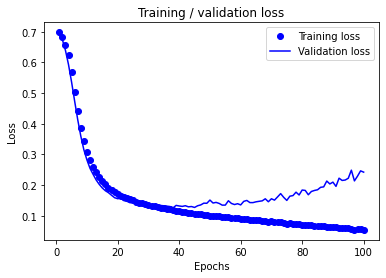

In [46]:
history_relu = history_relu.history
loss_values = history_relu['loss']
val_loss_values = history_relu['val_loss']

epochs = range(1, len(history_relu['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training / validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

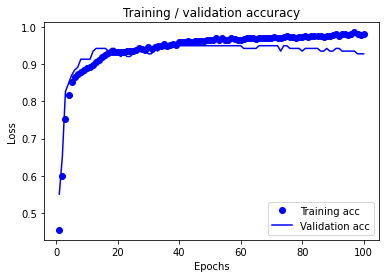

In [47]:
acc_values = history_relu['accuracy']
val_acc_values = history_relu['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training / validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the plots we can see deviation between training and validation loss / accuracy around 30 epochs. 

# Tanh Model

In [48]:
model_tanh = Sequential()
model_tanh.add(Dense(10, activation= 'tanh',input_shape=(training_data.shape[1],))) 
model_tanh.add(Dense(8, activation= 'tanh')) 
model_tanh.add(Dense(6, activation= 'tanh')) 
model_tanh.add(Dense(1, activation= 'sigmoid'))

In [49]:
model_tanh.compile(loss ='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [50]:
history_tanh = model_tanh.fit(training_data, training_labels, epochs=100, batch_size=20, validation_split= 0.2)

Epoch 1/100
28/28 [==============================] - 1s 9ms/step - loss: 0.4861 - accuracy: 0.8229 - val_loss: 0.4109 - val_accuracy: 0.8623
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8560 - val_loss: 0.3679 - val_accuracy: 0.8768
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8712 - val_loss: 0.3400 - val_accuracy: 0.8841
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8847 - val_loss: 0.3169 - val_accuracy: 0.8841
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8924 - val_loss: 0.2960 - val_accuracy: 0.9058
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.8873 - val_loss: 0.2770 - val_accuracy: 0.8986
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9193 - val_loss: 0.2612 - val_accuracy: 0.9130
Epoch 8/100
2

In [51]:
print (history_tanh.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


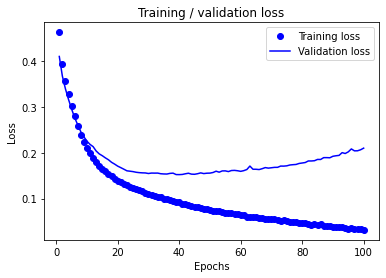

In [52]:
history_tanh = history_tanh.history
loss_values = history_tanh['loss']
val_loss_values = history_tanh['val_loss']

epochs = range(1, len(history_tanh['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training / validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

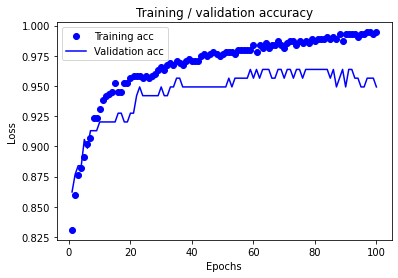

In [53]:
acc_values = history_tanh['accuracy']
val_acc_values = history_tanh['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training / validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the plots we can see deviation between training and validation loss / accuracy after 10 epochs. 

Retrain Relu Model to curb overfitting as that gives us slightly better resluts overall. 

In [63]:
model = Sequential()
model.add(Dense(10, activation= 'relu',input_shape =(training_data.shape[1],)))
model.add(Dense(8, activation= 'relu')) 
model.add(Dense(6, activation= 'relu')) 
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss ='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=30, batch_size=20, validation_split= 0.2)

Epoch 1/30
28/28 [==============================] - 1s 10ms/step - loss: 0.6214 - accuracy: 0.6452 - val_loss: 0.4950 - val_accuracy: 0.8478
Epoch 2/30
28/28 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.8273 - val_loss: 0.4070 - val_accuracy: 0.8913
Epoch 3/30
28/28 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8657 - val_loss: 0.3408 - val_accuracy: 0.9130
Epoch 4/30
28/28 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8719 - val_loss: 0.2918 - val_accuracy: 0.9275
Epoch 5/30
28/28 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8818 - val_loss: 0.2566 - val_accuracy: 0.9275
Epoch 6/30
28/28 [==============================] - 0s 3ms/step - loss: 0.2769 - accuracy: 0.9159 - val_loss: 0.2319 - val_accuracy: 0.9420
Epoch 7/30
28/28 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9420 - val_loss: 0.2144 - val_accuracy: 0.9420
Epoch 8/30
28/28 [=

# Evaluation / Prediction

In [64]:
accuracy_score = model.evaluate(testing_data, testing_labels, batch_size=20)
print('accuracy score ', accuracy_score[1] * 100, '%')

15/15 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9291
accuracy score  92.90540814399719 %


In [65]:
model.predict(np.array(testing_data.iloc[1,:]).reshape(1,testing_data.shape[1]))

array([[0.64990735]], dtype=float32)

In [66]:
pred_score = model.predict(testing_data)

In [67]:
pred_label = (pred_score > 0.5)
tf.math.confusion_matrix(
    testing_labels, pred_label, num_classes=2, weights=None, dtype=tf.dtypes.int32,name=None)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[140,   8],
       [ 13, 135]], dtype=int32)>

In [68]:
np.count_nonzero(pred_label)

143